# Exam 1

## Dataset 


Dataset "BusinessPlanData.dta" is based on simplified version of the dataset collected as part of the field experiment in Niger that is now published in American Economic Review.

The paper is: McKenzie, D. (2017). Identifying and spurring high-growth entrepreneurship: experimental evidence from a business plan competition. American Economic Review, 107(8), 2278-2307.
The paper and the full dataset can be found here: https://www.aeaweb.org/articles?id=10.1257/aer.20151404

Basically, the author runs a field experiment with a pool of entrepreneurs applying to a national business plan competition in Nigeria. The last stage of the selection process randomly selected 720 semi-finalists (out of 1,920 semi-finalists) to win the business plan program. The program consisted of an initial four-day training, a grant paid in four tranches, some mentoring, and two additional two-day training events. The entrepreneurs were then tracked through surveys over a period of five years.
The paper basically compares the group of semi-finalists randomly allocated to the business plan treatment (called ‘treatment’ group) to the control group of all the other semi-finalists who were not allocated to the business plan program.
The published paper looks at whether the business plan treatment had any significant effect on firms’ (self-reported) survival, profits, sales, and employment, but it also contains data on how many hours the entrepreneurs reported to work in their business in a usual week three years after the business plan competition.

Our main variable of interest (the dependent variable) for the task is the variable ‘hoursusualweek’, a continuous variable counting the number of hours that the entrepreneurs worked in a normal week three years after the intervention.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.svm import SVC 
from sklearn import tree
from sklearn import cross_validation
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing

C:\Users\nmelkony\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load BusinessPlanData data in dta format and assign it to a variable 
Hint: It is not mandatory to convert categoricals

In [2]:
data = pd.read_stata('BusinessPlanData.dta', convert_categoricals=False)
data

,uid,sex_applicant,state_origin,state_residence,passfirstround,female,male,northcentral,northeastern,northwestern,...,have_satellite_dishes,region,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues
0,60803.0,Male,Akwa Ibom,Ebonyi,1.0,0.0,1.0,0.0,0.0,0.0,...,0,North-Eastern,87,38.0,0.0,NaN,NaN,NaN,NaN,NaN
1,103866.0,Male,Abia,Kaduna,1.0,0.0,1.0,0.0,0.0,1.0,...,1,North-Western,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0
2,41190.0,Female,Kwara,Abuja,1.0,1.0,0.0,1.0,0.0,0.0,...,1,North-Central,86,49.0,0.0,NaN,NaN,NaN,NaN,NaN
3,61145.0,Male,Kogi,Abuja,1.0,0.0,1.0,1.0,0.0,0.0,...,1,North-Central,72,60.0,0.0,40.0,50.0,2.0,1.0,1000000.0
4,34746.0,Male,Akwa Ibom,Akwa Ibom,1.0,0.0,1.0,0.0,0.0,0.0,...,0,South-South,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0
5,76658.0,Male,Imo,Plateau,1.0,0.0,1.0,1.0,0.0,0.0,...,0,South-Eastern,72,60.0,0.0,42.0,42.0,2.0,0.0,1200000.0
6,57036.0,Male,Bauchi,Abuja,1.0,0.0,1.0,1.0,0.0,0.0,...,0,North-Central,86,35.0,0.0,36.0,36.0,0.0,NaN,700000.0
7,85227.0,Female,Abia,Abia,1.0,1.0,0.0,0.0,0.0,0.0,...,2,South-Eastern,51,53.0,0.0,NaN,NaN,NaN,NaN,NaN
8,25891.0,Male,Kaduna,Abuja,1.0,0.0,1.0,1.0,0.0,0.0,...,1,North-Western,88,43.0,0.0,NaN,NaN,NaN,NaN,NaN
9,28556.0,Male,Oyo,Osun,1.0,0.0,1.0,0.0,0.0,0.0,...,1,South-Western,102,73.0,0.0,60.0,60.0,3.0,1.0,3800000.0


In [4]:
data.hoursusualweek.describe()

count    918.000000
mean      46.043573
std       22.292451
min        1.000000
25%       32.000000
50%       47.000000
75%       60.000000
max      168.000000
Name: hoursusualweek, dtype: float64

### Drop the columns where the type is object 

In [5]:
data=data.select_dtypes(exclude=['object'])
data

,uid,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,...,have_dvd_players,have_satellite_dishes,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues
0,60803.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,87,38.0,0.0,NaN,NaN,NaN,NaN,NaN
1,103866.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0
2,41190.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,86,49.0,0.0,NaN,NaN,NaN,NaN,NaN
3,61145.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,1,72,60.0,0.0,40.0,50.0,2.0,1.0,1000000.0
4,34746.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0
5,76658.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,72,60.0,0.0,42.0,42.0,2.0,0.0,1200000.0
6,57036.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,86,35.0,0.0,36.0,36.0,0.0,NaN,700000.0
7,85227.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,2,51,53.0,0.0,NaN,NaN,NaN,NaN,NaN
8,25891.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4,1,88,43.0,0.0,NaN,NaN,NaN,NaN,NaN
9,28556.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2,1,102,73.0,0.0,60.0,60.0,3.0,1.0,3800000.0


### Drop the rows where "hoursusualweek" column is nan 

In [6]:
data=data[pd.notnull(data['hoursusualweek'])]
data

,uid,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,...,have_dvd_players,have_satellite_dishes,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues
1,103866.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0
3,61145.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,1,72,60.0,0.0,40.0,50.0,2.0,1.0,1000000.0
4,34746.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0
5,76658.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,72,60.0,0.0,42.0,42.0,2.0,0.0,1200000.0
6,57036.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,86,35.0,0.0,36.0,36.0,0.0,NaN,700000.0
9,28556.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2,1,102,73.0,0.0,60.0,60.0,3.0,1.0,3800000.0
11,19379.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,90,53.0,0.0,24.0,40.0,0.0,1.0,400000.0
14,47695.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1,89,33.0,0.0,18.0,18.0,1.0,NaN,150000.0
15,58626.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4,1,90,53.0,0.0,15.0,15.0,1.0,1.0,2250000.0
17,28230.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,86,56.0,0.0,84.0,84.0,1.0,0.0,19600000.0


### Drop the columns where input contains nan 

In [7]:
data=data.dropna(axis=1)
data

,uid,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,...,have_computers,have_dvd_players,have_satellite_dishes,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,revenues
1,103866.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,1,88,36.0,0.0,60.0,60.0,0.0,1600000.0
3,61145.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,2,1,72,60.0,0.0,40.0,50.0,2.0,1000000.0
4,34746.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2,1,0,90,70.0,0.0,20.0,16.0,0.0,800000.0
5,76658.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,72,60.0,0.0,42.0,42.0,2.0,1200000.0
6,57036.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,86,35.0,0.0,36.0,36.0,0.0,700000.0
9,28556.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,2,1,102,73.0,0.0,60.0,60.0,3.0,3800000.0
11,19379.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,90,53.0,0.0,24.0,40.0,0.0,400000.0
14,47695.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1,1,89,33.0,0.0,18.0,18.0,1.0,150000.0
15,58626.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2,4,1,90,53.0,0.0,15.0,15.0,1.0,2250000.0
17,28230.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,86,56.0,0.0,84.0,84.0,1.0,19600000.0


### Drop the columns which names contain "id" string 

In [8]:
data = data[data.columns.drop(list(data.filter(regex='id')))]
data

,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,age,...,have_televisions,have_computers,have_dvd_players,have_satellite_dishes,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,revenues
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,...,1,1,1,1,36.0,0.0,60.0,60.0,0.0,1600000.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0,...,3,2,2,1,60.0,0.0,40.0,50.0,2.0,1000000.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,...,1,2,1,0,70.0,0.0,20.0,16.0,0.0,800000.0
5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,...,1,1,0,0,60.0,0.0,42.0,42.0,2.0,1200000.0
6,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,31.0,...,1,0,1,0,35.0,0.0,36.0,36.0,0.0,700000.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,...,2,1,2,1,73.0,0.0,60.0,60.0,3.0,3800000.0
11,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,...,1,1,1,0,53.0,0.0,24.0,40.0,0.0,400000.0
14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,...,1,1,1,1,33.0,0.0,18.0,18.0,1.0,150000.0
15,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,...,5,2,4,1,53.0,0.0,15.0,15.0,1.0,2250000.0
17,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,27.0,...,1,1,0,1,56.0,0.0,84.0,84.0,1.0,19600000.0


### Scale "revenues" feature to [0,10] range using Min Max Scaler 

In [15]:
aaa=preprocessing.minmax_scale(data.revenues, feature_range=(0,10))
data['revenues']=aaa
data

C:\Users\nmelkony\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,age,...,have_televisions,have_computers,have_dvd_players,have_satellite_dishes,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,revenues
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,...,1,1,1,1,36.0,0.0,60.0,60.0,0.0,0.045714
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0,...,3,2,2,1,60.0,0.0,40.0,50.0,2.0,0.028571
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,...,1,2,1,0,70.0,0.0,20.0,16.0,0.0,0.022857
5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,...,1,1,0,0,60.0,0.0,42.0,42.0,2.0,0.034286
6,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,31.0,...,1,0,1,0,35.0,0.0,36.0,36.0,0.0,0.020000
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,...,2,1,2,1,73.0,0.0,60.0,60.0,3.0,0.108571
11,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,...,1,1,1,0,53.0,0.0,24.0,40.0,0.0,0.011429
14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,...,1,1,1,1,33.0,0.0,18.0,18.0,1.0,0.004286
15,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,...,5,2,4,1,53.0,0.0,15.0,15.0,1.0,0.064286
17,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,27.0,...,1,1,0,1,56.0,0.0,84.0,84.0,1.0,0.560000


In [16]:
data.revenues.describe()

count    918.000000
mean       0.177720
std        0.560027
min        0.000000
25%        0.020957
50%        0.058286
75%        0.166464
max       10.000000
Name: revenues, dtype: float64

### Use Linear Regression and VIF to drop correlated features. For VIF threshold use 5

In [12]:
Y=data.hoursusualweek
X=data.drop(['hoursusualweek'],axis=1) 
reg=linear_model.LinearRegression()
reg.fit(X,Y)
data
print (reg.score(X,Y))


0.6644791351020577


In [13]:
data1=calculate_vif_(X, thresh=5)

C:\Users\nmelkony\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\nmelkony\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'northcentral' at index: 3
dropping 'polytechnic' at index: 10
dropping 'new' at index: 14
dropping 'male' at index: 2
dropping 'passfirstround' at index: 0
dropping 'age' at index: 6
dropping 'totalmark' at index: 10
dropping 'totalmarks' at index: 42
dropping 'computer_skills' at index: 13
dropping 'have_televisions' at index: 37
dropping 'marital_status' at index: 15
dropping 'have_genrators' at index: 33
dropping 'have_dvd_players' at index: 36
dropping 'marketing_training' at index: 12
dropping 'business_sector' at index: 13
Remaining variables:
Index(['female', 'northeastern', 'northwestern', 'southeastern', 'southsouth',
       'southwestern', 'highschooledn', 'university', 'postgraduate',
       'missingedn', 'existing', 'business_accounting_training',
       'vocational_training', 'number_of_children', 'number_of_brothers',
       'number_of_sisters', 'lived_worked_abroad', 'have_internet',
       'have_agricultural', 'have_sewing_machines', 'have_gas_cookers',
      

In [122]:
reg=linear_model.LinearRegression()
reg.fit(data1,Y)
reg.score(data1,Y)


0.6482203073478531

In [123]:
data1

,northeastern,northwestern,southeastern,southsouth,southwestern,polytechnic,postgraduate,missingedn,existing,business_accounting_training,...,have_motorcycles,have_cars_and_other_vehicles,have_hifis,have_microwaves,have_computers,have_satellite_dishes,treatment,hourslastweek,hiredworkers,revenues
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0,0,0,0,1,1,0.0,60.0,0.0,0.045714
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,2,1,0.0,40.0,2.0,0.028571
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,2,0,0.0,20.0,0.0,0.022857
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,...,0,2,1,0,1,0,0.0,42.0,2.0,0.034286
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,...,0,0,1,0,0,0,0.0,36.0,0.0,0.020000
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,1,1,0.0,60.0,3.0,0.108571
11,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,...,0,0,0,0,1,0,0.0,24.0,0.0,0.011429
14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,...,0,1,0,1,1,1,0.0,18.0,1.0,0.004286
15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0,3,2,1,2,1,0.0,15.0,1.0,0.064286
17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,1,1,0.0,84.0,1.0,0.560000


### Find the feature that has biggest Pearson correlation with dependent variable ("hoursusualweek") 

In [127]:
data1['hoursusualweek']=data['hoursusualweek']
most_cor=data1[data1.columns[:]].corr()['hoursusualweek'][:]
most_cor.sort_values(ascending=False)

C:\Users\nmelkony\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


hoursusualweek                  1.000000
hourslastweek                   0.778815
hiredworkers                    0.120959
southeastern                    0.104028
northeastern                    0.083927
have_motorcycles                0.081351
vocational_training             0.076085
have_bicycles                   0.054587
treatment                       0.052710
number_of_brothers              0.048656
have_electric_stoves            0.041544
have_agricultural               0.038021
existing                        0.037878
have_kerosene_stoves            0.037845
have_sewing_machines            0.026205
polytechnic                     0.022988
revenues                        0.010636
missingedn                     -0.000234
number_of_sisters              -0.008128
business_accounting_training   -0.013692
southsouth                     -0.018230
have_hifis                     -0.030490
have_freezers                  -0.037736
have_electric_clothes_driers   -0.040928
have_gas_stoves 

### Plot Heatmap 

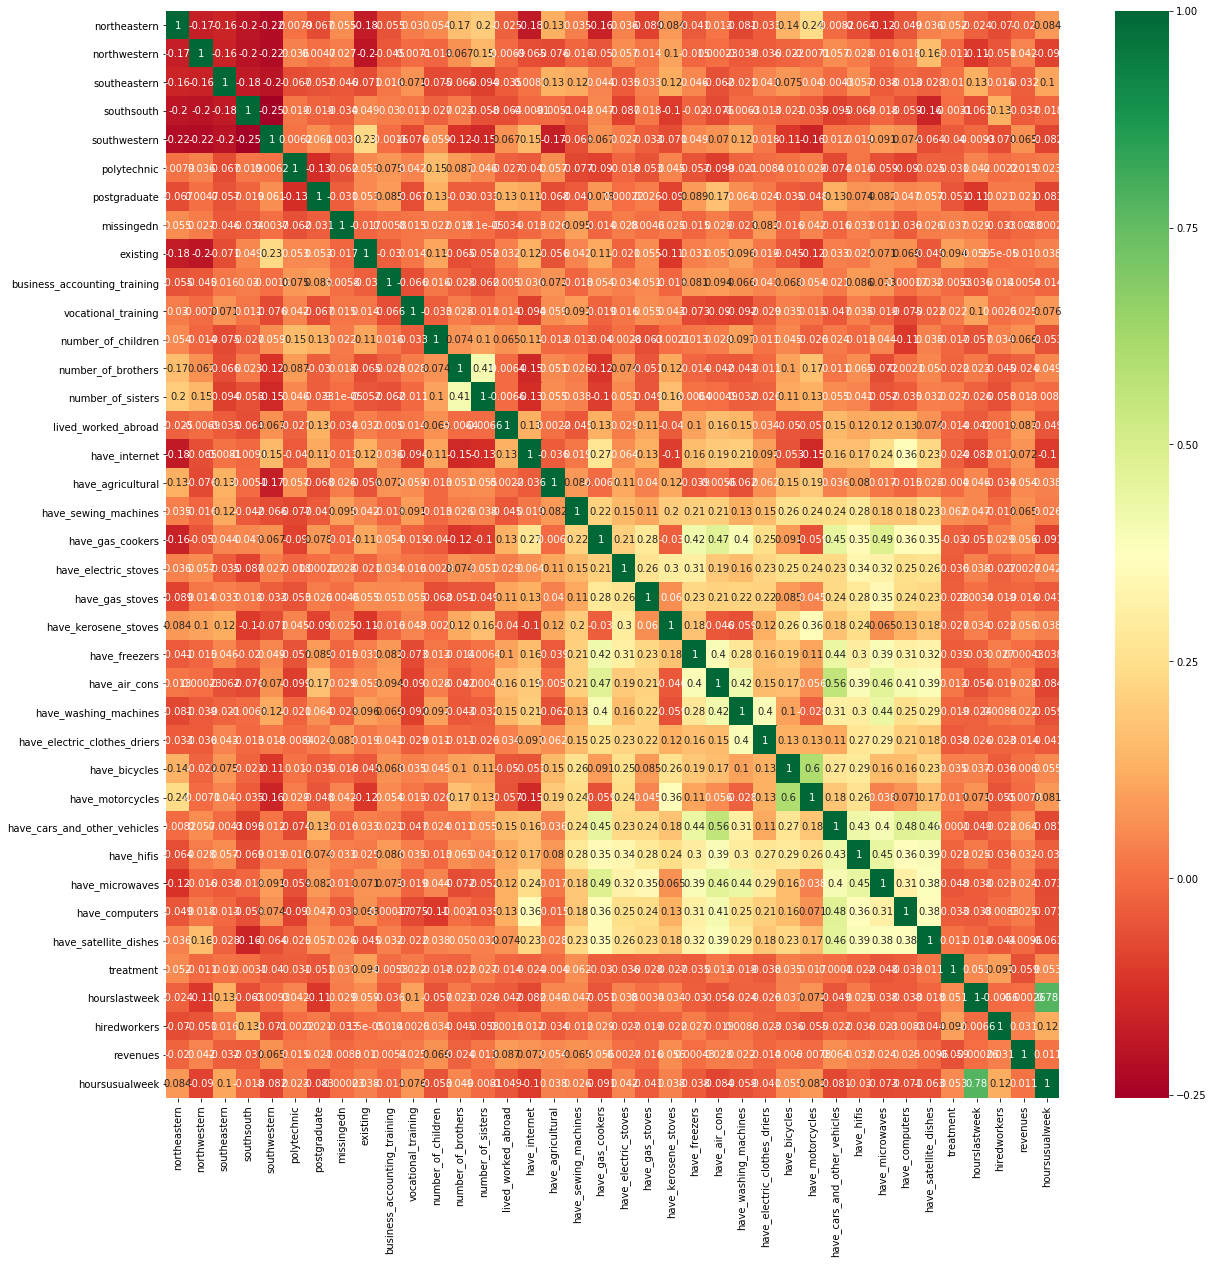

In [129]:
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]